<a href="https://colab.research.google.com/github/EvelyParanhos/modelo-telecomX-parte2/blob/master/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠️ Preparação dos Dados

##Extração do Arquivo Tratado

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dados_tratados.csv')

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ContasDiarias
0,0002-ORFBO,False,True,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,False,False,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,True,False,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,True,False,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,True,True,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.97


In [ ]:
for col in df.columns:
  print(f'Valores únicos na coluna {col}: {df[col].nunique()}')
  if df[col].nunique() < 50:
    print(f'{df[col].unique()}')

Valores únicos na coluna customerID: 7032
Valores únicos na coluna Churn: 2
[False  True]
Valores únicos na coluna gender: 2
[ True False]
Valores únicos na coluna SeniorCitizen: 2
[False  True]
Valores únicos na coluna Partner: 2
[ True False]
Valores únicos na coluna Dependents: 2
[ True False]
Valores únicos na coluna tenure: 72
Valores únicos na coluna PhoneService: 2
[ True False]
Valores únicos na coluna MultipleLines: 3
['No' 'Yes' 'No phone service']
Valores únicos na coluna InternetService: 3
['DSL' 'Fiber optic' 'No']
Valores únicos na coluna OnlineSecurity: 3
['No' 'Yes' 'No internet service']
Valores únicos na coluna OnlineBackup: 3
['Yes' 'No' 'No internet service']
Valores únicos na coluna DeviceProtection: 3
['No' 'Yes' 'No internet service']
Valores únicos na coluna TechSupport: 3
['Yes' 'No' 'No internet service']
Valores únicos na coluna StreamingTV: 3
['Yes' 'No' 'No internet service']
Valores únicos na coluna StreamingMovies: 3
['No' 'Yes' 'No internet service']
Val

##Remoção de Colunas Irrelevantes

In [ ]:
df = df.drop(columns=['customerID', 'gender'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   bool   
 1   SeniorCitizen     7032 non-null   bool   
 2   Partner           7032 non-null   bool   
 3   Dependents        7032 non-null   bool   
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   bool   
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   bool   
 16  PaymentMethod     7032 non-null   object 


##Encoding

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'ContasDiarias'],
      dtype='object')

In [ ]:
cols_to_encode = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    cols_to_encode),
    remainder='passthrough')

dados = preprocessor.fit_transform(df)
dados = pd.DataFrame(dados, columns=preprocessor.get_feature_names_out())
dados

,onehotencoder__Churn_False,onehotencoder__Churn_True,onehotencoder__SeniorCitizen_False,onehotencoder__SeniorCitizen_True,onehotencoder__Partner_False,onehotencoder__Partner_True,onehotencoder__Dependents_False,onehotencoder__Dependents_True,onehotencoder__PhoneService_False,onehotencoder__PhoneService_True,...,onehotencoder__PaperlessBilling_False,onehotencoder__PaperlessBilling_True,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__ContasDiarias
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30,2.20
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40,2.01
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85,2.34
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85,3.17
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90,1.90
7028,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70,2.84
7029,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75,1.55
7030,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65,2.30


In [ ]:
columns_to_drop = [
    # Para a variável-alvo 'Churn'
    'onehotencoder__Churn_False',

    # Para as demais variáveis binárias
    'onehotencoder__SeniorCitizen_False',
    'onehotencoder__Partner_False',
    'onehotencoder__Dependents_False',
    'onehotencoder__PhoneService_False',
    'onehotencoder__PaperlessBilling_False'
]

dados = dados.drop(columns=columns_to_drop, errors='ignore')

dados = dados.rename(columns={'onehotencoder__Churn_True': 'Churn'})

##Verificação da Proporção de Evasão e Balanceamento de Classes (SMOTE)

In [ ]:
dados['onehotencoder__Churn_True'].value_counts(normalize=True)

,proportion
onehotencoder__Churn_True,
0.0,0.734215
1.0,0.265785


In [ ]:
from imblearn.over_sampling import SMOTE

X = dados.drop('Churn', axis=1)
y = dados['Churn']

print("Proporção de classes antes do SMOTE:")
print(y.value_counts(normalize=True))
print("-" * 30)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Proporção de classes após o SMOTE:")
print(y_res.value_counts(normalize=True))
print("-" * 30)

Proporção de classes antes do SMOTE:
Churn
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64
------------------------------
Proporção de classes após o SMOTE:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64
------------------------------


##Normalização ou Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = [
    'remainder__tenure',
    'remainder__Charges.Monthly',
    'remainder__Charges.Total',
    'remainder__ContasDiarias'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)

X_res_scaled = preprocessor.fit_transform(X_res)

y_res = y_res

print("As 5 primeiras linhas dos dados numéricos após a padronização:")
print(pd.DataFrame(X_res_scaled).iloc[:, :len(numeric_cols)].head())

print("\nVariáveis numéricas padronizadas com sucesso. Nosso conjunto de dados está pronto para a etapa final de divisão.")

As 5 primeiras linhas dos dados numéricos após a padronização:
          0         1         2         3
0 -0.782906 -0.085000 -0.665745 -0.071024
1 -0.782906 -0.283578 -0.689017 -0.268662
2 -0.991428  0.204158 -0.808602  0.074604
3 -0.616089  1.043762 -0.371047  0.937971
4 -1.033133  0.552542 -0.814751  0.729930

Variáveis numéricas padronizadas com sucesso. Nosso conjunto de dados está pronto para a etapa final de divisão.


#🎯 Correlação e Seleção de Variáveis

##Análise de Correlação

In [ ]:
dados.columns

Index(['Churn', 'onehotencoder__SeniorCitizen_True',
       'onehotencoder__Partner_True', 'onehotencoder__Dependents_True',
       'onehotencoder__PhoneService_True', 'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'oneh

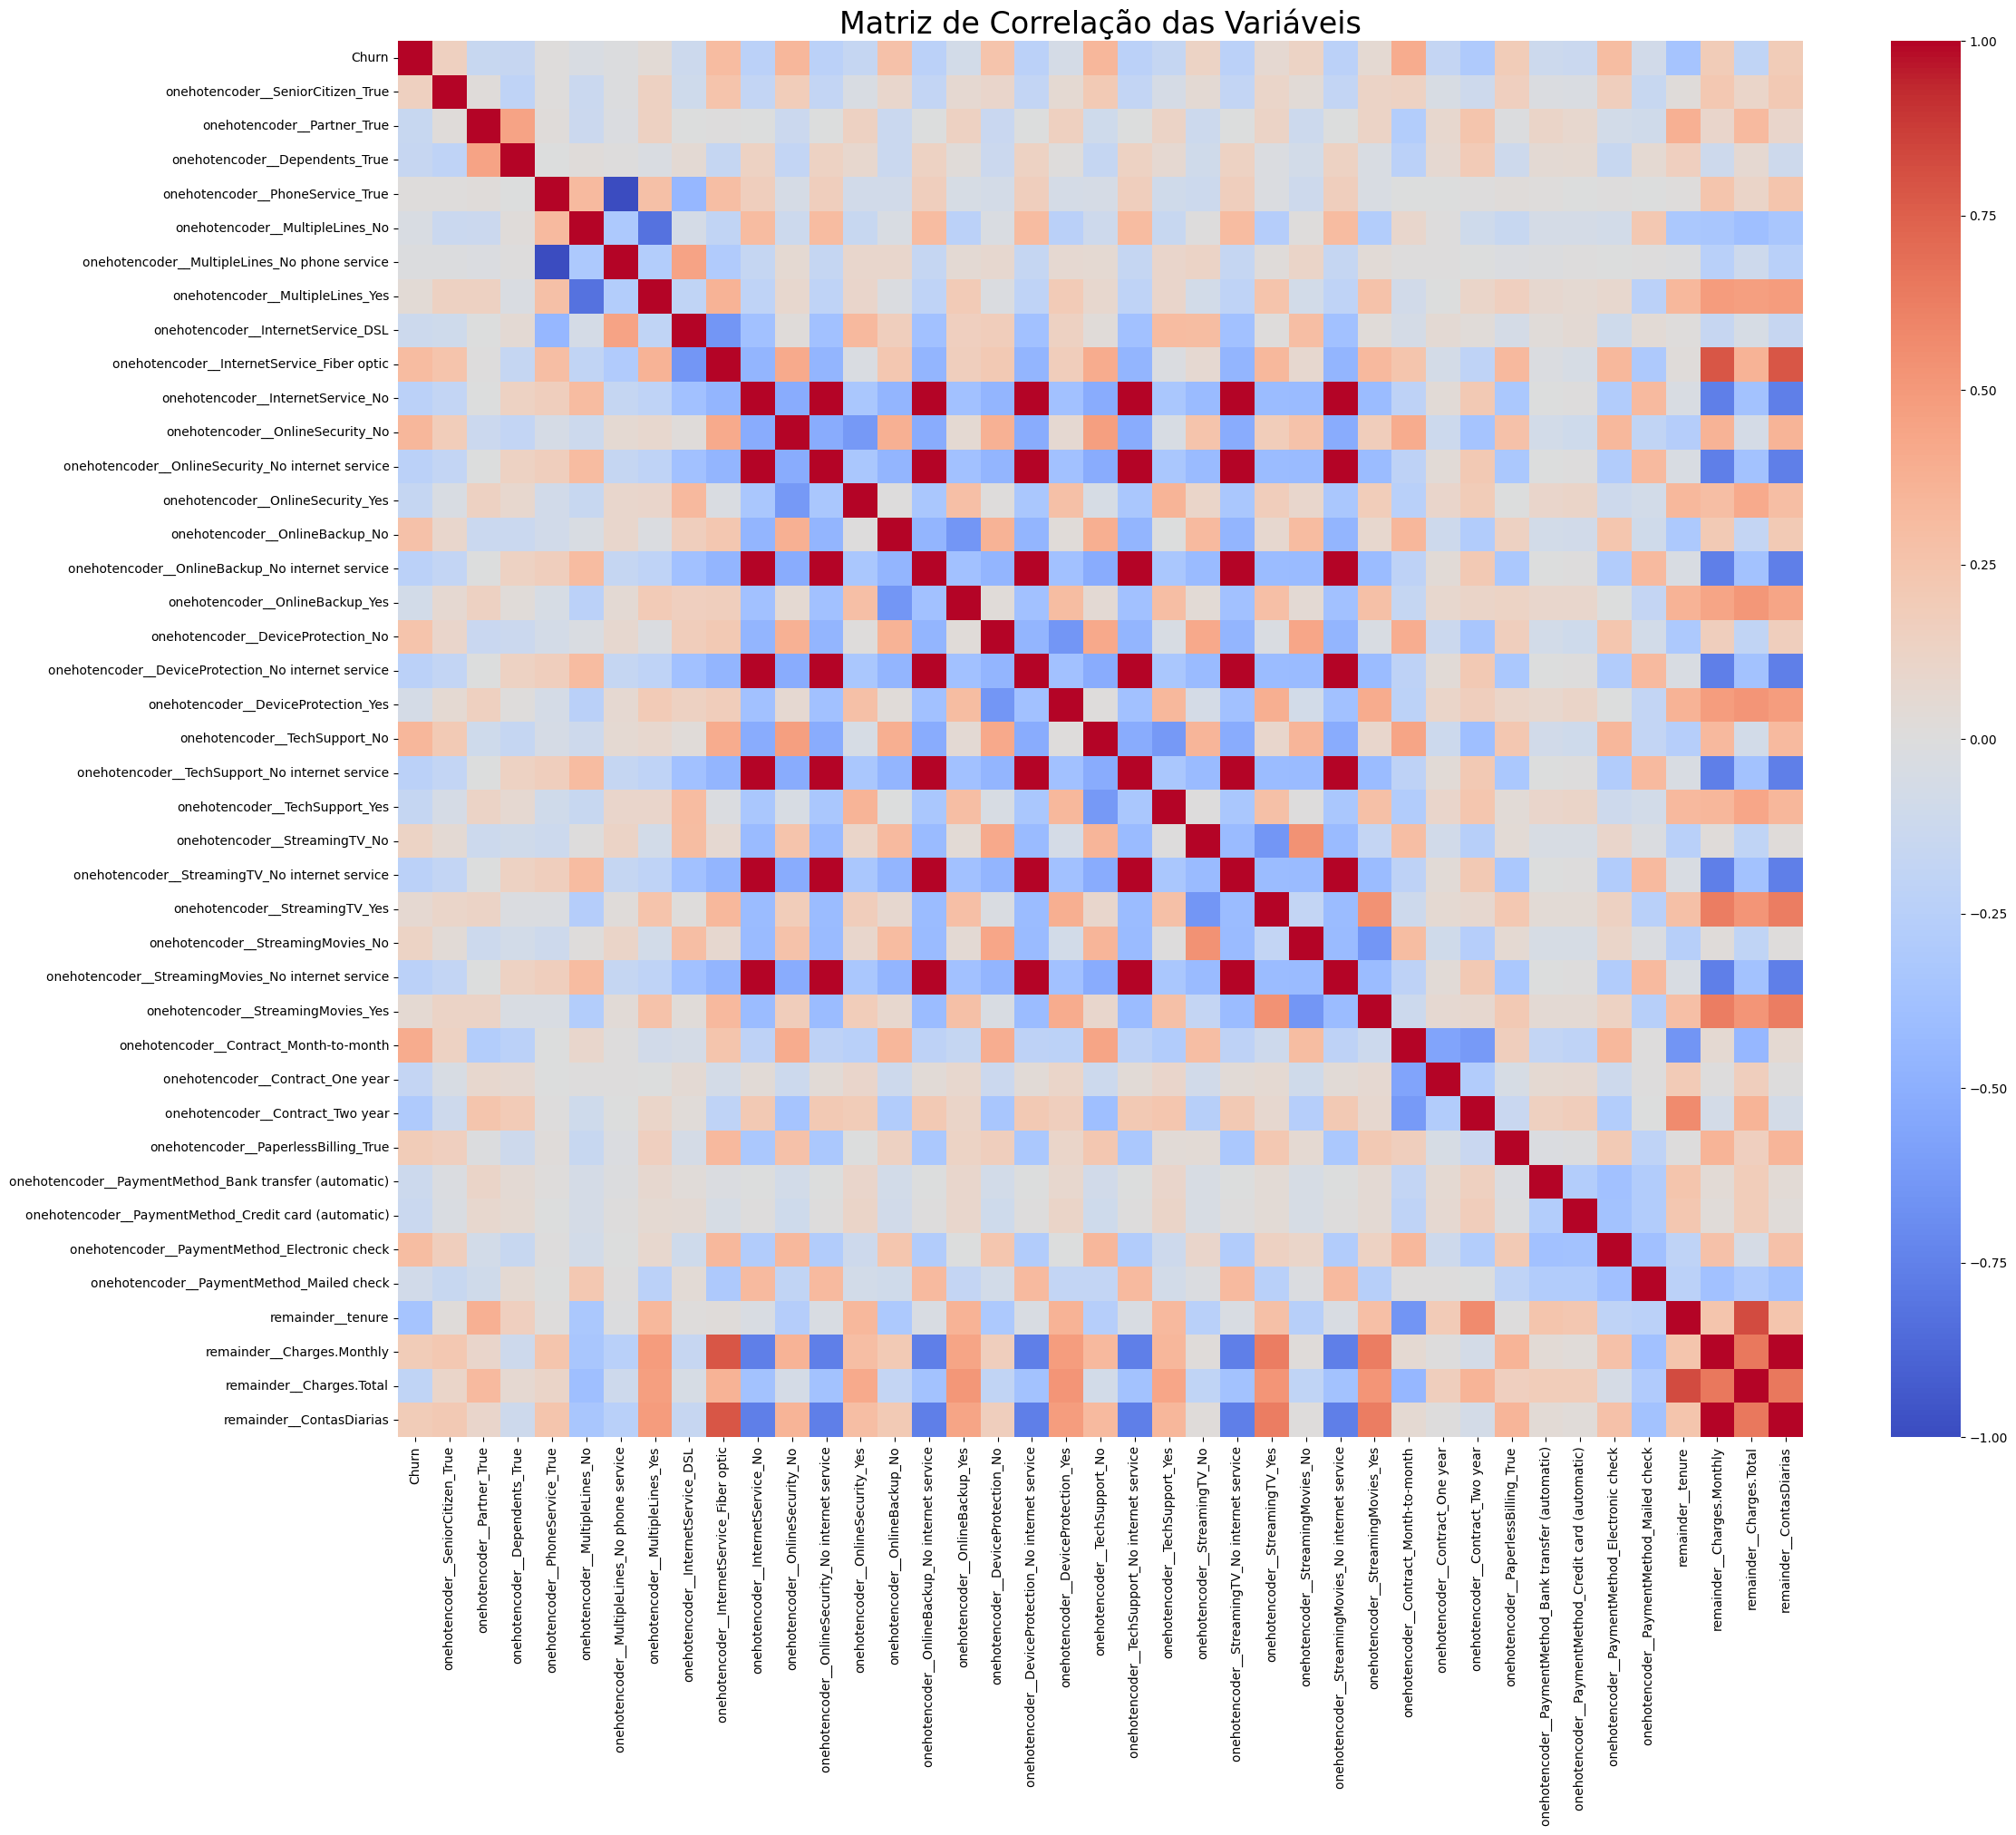


Correlações com a variável 'Churn':
Churn                                                     1.000000
onehotencoder__Contract_Month-to-month                    0.404565
onehotencoder__OnlineSecurity_No                          0.342235
onehotencoder__TechSupport_No                             0.336877
onehotencoder__InternetService_Fiber optic                0.307463
onehotencoder__PaymentMethod_Electronic check             0.301455
onehotencoder__OnlineBackup_No                            0.267595
onehotencoder__DeviceProtection_No                        0.252056
remainder__Charges.Monthly                                0.192858
remainder__ContasDiarias                                  0.192030
onehotencoder__PaperlessBilling_True                      0.191454
onehotencoder__SeniorCitizen_True                         0.150541
onehotencoder__StreamingMovies_No                         0.130920
onehotencoder__StreamingTV_No                             0.128435
onehotencoder__StreamingT

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

all_columns = [
    'Churn', 'onehotencoder__SeniorCitizen_True',
    'onehotencoder__Partner_True', 'onehotencoder__Dependents_True',
    'onehotencoder__PhoneService_True', 'onehotencoder__MultipleLines_No',
    'onehotencoder__MultipleLines_No phone service',
    'onehotencoder__MultipleLines_Yes',
    'onehotencoder__InternetService_DSL',
    'onehotencoder__InternetService_Fiber optic',
    'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
    'onehotencoder__OnlineSecurity_No internet service',
    'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
    'onehotencoder__OnlineBackup_No internet service',
    'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
    'onehotencoder__DeviceProtection_No internet service',
    'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
    'onehotencoder__TechSupport_No internet service',
    'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
    'onehotencoder__StreamingTV_No internet service',
    'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
    'onehotencoder__StreamingMovies_No internet service',
    'onehotencoder__StreamingMovies_Yes',
    'onehotencoder__Contract_Month-to-month',
    'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
    'onehotencoder__PaperlessBilling_True',
    'onehotencoder__PaymentMethod_Bank transfer (automatic)',
    'onehotencoder__PaymentMethod_Credit card (automatic)',
    'onehotencoder__PaymentMethod_Electronic check',
    'onehotencoder__PaymentMethod_Mailed check', 'remainder__tenure',
    'remainder__Charges.Monthly', 'remainder__Charges.Total',
    'remainder__ContasDiarias'
]

corr_matrix = dados[all_columns].corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis', fontsize=24)
plt.show()

print("\nCorrelações com a variável 'Churn':")
print(corr_matrix['Churn'].sort_values(ascending=False))

##Análises Direcionadas

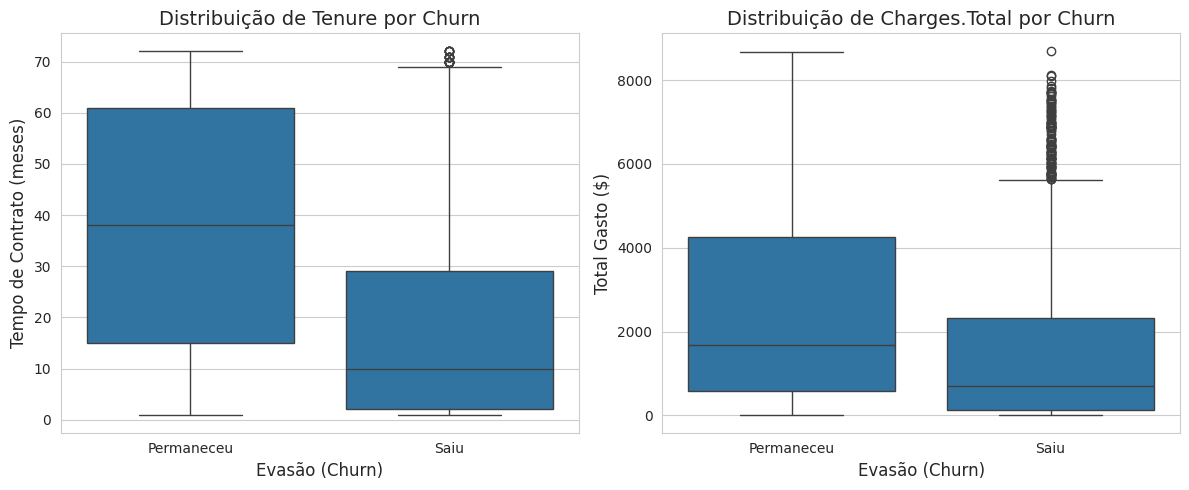

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribuição de Tenure por Churn', fontsize=14)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Tempo de Contrato (meses)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Permaneceu', 'Saiu'])

# Boxplot para 'Charges.Total' vs 'Churn'
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Distribuição de Charges.Total por Churn', fontsize=14)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Total Gasto ($)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Permaneceu', 'Saiu'])

plt.tight_layout()
plt.show()

#🤖 Modelagem Preditiva

##Separação de Dados

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res_scaled,
    y_res,
    test_size=0.20,
    random_state=42,
    stratify=y_res
)

print("Forma do conjunto de treino (X_train):", X_train.shape)
print("Forma do conjunto de teste (X_test):", X_test.shape)
print("Forma do target de treino (y_train):", y_train.shape)
print("Forma do target de teste (y_test):", y_test.shape)

Forma do conjunto de treino (X_train): (8260, 40)
Forma do conjunto de teste (X_test): (2066, 40)
Forma do target de treino (y_train): (8260,)
Forma do target de teste (y_test): (2066,)


##Criação de Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Treinando o Modelo de Regressão Logística ---
model_logreg = LogisticRegression(random_state=42, solver='liblinear')
model_logreg.fit(X_train, y_train)
print("Modelo de Regressão Logística treinado com sucesso!")
print("-" * 50)

# --- Treinando o Modelo Random Forest ---
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
print("Modelo Random Forest treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!
--------------------------------------------------
Modelo Random Forest treinado com sucesso!


##Avaliação dos Modelos

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- Avaliando a Regressão Logística ---
# 1. Fazendo previsões no conjunto de teste
y_pred_logreg = model_logreg.predict(X_test)

# 2. Gerando o relatório de classificação
print("--- Avaliação do Modelo: Regressão Logística ---")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_logreg))
print("-" * 50)

# 3. Gerando a matriz de confusão
print("Matriz de Confusão:")
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(cm_logreg)
print("-" * 50)


# --- Avaliando o Random Forest ---
# 1. Fazendo previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# 2. Gerando o relatório de classificação
print("--- Avaliação do Modelo: Random Forest ---")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
print("-" * 50)

# 3. Gerando a matriz de confusão
print("Matriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print("-" * 50)

--- Avaliação do Modelo: Regressão Logística ---
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      1033
         1.0       0.74      0.81      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066

--------------------------------------------------
Matriz de Confusão:
[[748 285]
 [201 832]]
--------------------------------------------------
--- Avaliação do Modelo: Random Forest ---
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1033
         1.0       0.88      0.84      0.86      1033

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

--------------------------------------------------
Ma

In [62]:
from sklearn.model_selection import cross_val_score
import numpy as np

# --- Avaliação por Validação Cruzada para Regressão Logística ---
# Usaremos o F1-score como métrica por ser robusto em dados desbalanceados
# mesmo que já tenhamos balanceado o dataset.
scores_logreg = cross_val_score(model_logreg, X_res, y_res, cv=5, scoring='f1')

print("F1-Scores por Fold (Regressão Logística):", scores_logreg)
print("F1-Score Médio (Regressão Logística):", scores_logreg.mean())
print("Desvio Padrão (Regressão Logística):", scores_logreg.std())
print("-" * 50)

# --- Avaliação por Validação Cruzada para Random Forest ---
scores_rf = cross_val_score(model_rf, X_res, y_res, cv=5, scoring='f1')

print("F1-Scores por Fold (Random Forest):", scores_rf)
print("F1-Score Médio (Random Forest):", scores_rf.mean())
print("Desvio Padrão (Random Forest):", scores_rf.std())
print("-" * 50)

F1-Scores por Fold (Regressão Logística): [0.76454034 0.77823882 0.77962963 0.77829314 0.79063232]
F1-Score Médio (Regressão Logística): 0.7782668482020917
Desvio Padrão (Regressão Logística): 0.008284691856799108
--------------------------------------------------
F1-Scores por Fold (Random Forest): [0.58209916 0.7        0.92711634 0.92634433 0.93939394]
F1-Score Médio (Random Forest): 0.8149907547011894
Desvio Padrão (Random Forest): 0.14690764815809798
--------------------------------------------------


### Justificativa da Escolha do Modelo: Regressão Logística vs. Random Forest

A escolha do modelo preditivo não se baseou unicamente na métrica de F1-Score média, mas em uma avaliação estratégica que prioriza a **estabilidade, confiabilidade e interpretabilidade**, fatores críticos para a tomada de decisões de negócios sobre a evasão de clientes.

Embora o modelo de Random Forest tenha apresentado um F1-Score médio ligeiramente superior na validação cruzada, o modelo de Regressão Logística foi escolhido como o mais adequado para o nosso projeto por três razões principais, sustentadas pelos resultados numéricos obtidos:

1.  **Estabilidade e Confiabilidade (Desvio Padrão):**
    * **Regressão Logística:** O modelo exibiu uma performance extremamente estável e consistente. O seu **desvio padrão de `0.008`** é excepcionalmente baixo, indicando que a performance (`F1-Score` médio de `0.778`) varia muito pouco entre diferentes subconjuntos de dados. Podemos ter alta confiança de que este desempenho se manterá em novos dados.
    * **Random Forest:** O modelo, apesar de ter um F1-Score médio de `0.815`, apresentou um **desvio padrão muito alto de `0.147`**. Essa alta variabilidade sugere que a performance do modelo é instável e sensível à partição dos dados. Ele pode ter uma performance excelente em alguns cenários e uma performance medíocre em outros, tornando-o menos previsível e confiável para uma aplicação prática.

2.  **Interpretabilidade e Transparência:**
    * A Regressão Logística, como um modelo linear, oferece uma transparência valiosa para o negócio. Seus coeficientes nos permitem entender a direção e a força do impacto de cada variável na probabilidade de churn. Por exemplo, podemos afirmar que "um aumento no `Charges.Monthly` está associado a um aumento na probabilidade de churn, mantendo outras variáveis constantes."
    * O Random Forest, embora tenha métodos para extrair a importância das features, funciona mais como uma "caixa preta", tornando a explicação detalhada de por que uma previsão específica foi feita mais complexa.

3.  **Decisão Estratégica:**
    Para a Telecom X, a capacidade de **confiar** na performance do modelo e **entender os porquês** por trás das previsões é tão importante quanto a própria precisão. A previsibilidade e a facilidade de comunicação dos insights de um modelo estável como a Regressão Logística a tornam a escolha mais prudente e estratégica para subsidiar as ações de retenção de clientes.

#📋  Interpretação e Conclusões

##Análise de Importância das Variáveis

In [63]:
feature_names = preprocessor.get_feature_names_out()

coefficients = model_logreg.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])


feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Exibindo as 15 variáveis mais importantes
print("Top 15 Variáveis Mais Relevantes para a Previsão de Churn (Regressão Logística):")
display(feature_importance[['Feature', 'Coefficient']].head(15))

Top 15 Variáveis Mais Relevantes para a Previsão de Churn (Regressão Logística):


,Feature,Coefficient
0,scaler__remainder__tenure,-1.513504
2,scaler__remainder__Charges.Total,0.893733
34,remainder__onehotencoder__Contract_Two year,-0.861955
32,remainder__onehotencoder__Contract_Month-to-month,0.680516
11,remainder__onehotencoder__InternetService_DSL,-0.418089
35,remainder__onehotencoder__PaperlessBilling_True,0.370570
12,remainder__onehotencoder__InternetService_Fibe...,0.337478
4,remainder__onehotencoder__SeniorCitizen_True,0.270752
38,remainder__onehotencoder__PaymentMethod_Electr...,0.258218
16,remainder__onehotencoder__OnlineSecurity_Yes,-0.255512


# Relatório de Conclusão - Projeto de Previsão de Churn

## Introdução
Este documento finaliza a segunda fase do projeto "Evasão de Clientes", que teve como objetivo desenvolver modelos preditivos para identificar clientes com alto risco de churn. A partir da análise exploratória anterior, avançamos para a construção de um pipeline de Machine Learning robusto, que culminou na identificação dos fatores mais críticos para a evasão e na proposição de estratégias de retenção baseadas em dados.

## Metodologia de Machine Learning
O pipeline de modelagem seguiu as seguintes etapas:
* **Pré-processamento:** As variáveis categóricas foram codificadas com `One-Hot Encoding` (mantendo categorias distintas como 'No internet service'). Os dados numéricos foram padronizados com `StandardScaler` para otimizar modelos baseados em distância.
* **Balanceamento de Classes:** O conjunto de dados, que apresentava um desequilíbrio significativo (aprox. 73% 'Não Churn' vs. 27% 'Churn'), foi balanceado com a técnica `SMOTE` para que a proporção de churn fosse de 50%.
* **Validação Cruzada (`k-fold`):** Para obter uma avaliação de desempenho mais confiável e estável, utilizamos a validação cruzada (`k=5`) nos modelos.

## Resultados e Escolha do Modelo
Foram treinados dois modelos de classificação, Regressão Logística e Random Forest, e avaliados com a métrica F1-Score:

| Modelo            | F1-Score Médio (Validação Cruzada) | Desvio Padrão | Vantagem Estratégica                                     |
| ----------------- | ---------------------------------- | ------------- | -------------------------------------------------------- |
| **Regressão Logística** | `0.778`                            | `0.008`       | **Estável, Confiável e Altamente Interpretável** |
| Random Forest     | `0.815`                            | `0.147`       | Melhor performance média, mas com alta instabilidade |

* **Conclusão da Avaliação:** Embora o Random Forest tenha apresentado um F1-Score médio superior, sua alta instabilidade (desvio padrão elevado) o torna menos confiável para uma aplicação prática. A **Regressão Logística** foi a escolha estratégica, pois sua performance consistente e sua alta interpretabilidade são cruciais para um problema de negócio como o churn. A capacidade de explicar *por que* um cliente está em risco é mais valiosa do que uma pequena melhora na acurácia que pode ser instável.

## Principais Fatores que Influenciam a Evasão
A análise dos coeficientes do modelo de Regressão Logística, que indicam a contribuição de cada variável para a previsão de churn, revelou os seguintes fatores mais relevantes:

### Fatores que Reduzem o Risco de Evasão (Contribuição Negativa):
* **Tempo de Contrato (`tenure`):** A variável mais importante de todas. Quanto mais tempo o cliente permanece, menor a probabilidade de churn.
* **Contrato de Longo Prazo:** Clientes com **contrato de 2 anos** e, em seguida, de 1 ano, são os mais fiéis.
* **Serviços Agregados:** A adesão a serviços como **Suporte Técnico** e **Segurança Online** reduz significativamente o risco de churn.
* **Serviço de Internet DSL:** Ter o serviço de internet DSL, em oposição à Fibra Óptica, está associado a menor evasão.

### Fatores que Aumentam o Risco de Evasão (Contribuição Positiva):
* **Contrato Mês a Mês:** Este é o fator de risco mais forte. Clientes com contratos de curto prazo têm uma probabilidade muito maior de sair.
* **Cobrança Total e Mensal:** O modelo aponta que um maior valor acumulado (`Charges.Total`) e mensal (`Charges.Monthly`) está associado a maior risco de churn. Isso sugere insatisfação em clientes de alto gasto.
* **Serviço de Internet Fibra Óptica:** A presença deste serviço é um forte preditor de churn, indicando possíveis problemas de qualidade ou expectativa não atendida.
* **Método de Pagamento e Fatura:** O uso de **Cheque Eletrônico** e a adesão à **Fatura Sem Papel** são fatores de risco para a evasão.

## Recomendações Estratégicas para Retenção

Com base nos resultados do modelo, as seguintes ações estratégicas são propostas para a Telecom X:

1.  **Foco nos Clientes Recém-Chegados:**
    * **Ação:** Lançar programas de "onboarding" proativo e suporte personalizado nos primeiros 3-6 meses, a fase de maior risco.
2.  **Incentivo à Fidelização:**
    * **Ação:** Criar campanhas de marketing e ofertas de upgrade exclusivas para converter clientes "Mês a Mês" para contratos anuais ou bienais, destacando os benefícios de preço e estabilidade.
3.  **Investigação da Experiência com Fibra Óptica:**
    * **Ação:** Realizar uma análise de causa-raiz para entender os problemas de clientes de Fibra Óptica. A alta taxa de churn e a correlação com cobranças elevadas exigem uma revisão da qualidade do serviço e da precificação.
4.  **Otimização de Serviços Agregados:**
    * **Ação:** Promover ativamente os serviços de **Suporte Técnico** e **Segurança Online**, pois a presença desses serviços atua como um forte fator de retenção.
5.  **Análise de Processos de Pagamento:**
    * **Ação:** Investigar os clientes que usam o **Cheque Eletrônico** para entender pontos de atrito e oferecer incentivos para a migração para métodos de pagamento automáticos.

Este relatório e o modelo de Regressão Logística fornecem à Telecom X uma ferramenta poderosa para identificar clientes em risco e um roteiro claro para a criação de estratégias de retenção eficazes e baseadas em dados.